## Visualizing PCA Transformation

- Dimension reduction finds patterns in data and uses them to re-express it in a compressed form. VERY helpful for big datasets.
- Helpful also to reduce a dataset to its 'bare bone', discarding noisy features that cause big problems for supervised learning tasks like regression or classification.
- Principal Component Analysis (PCA) is a fundamental of dimensionality reduction technique. It performs dimensionality reduction in two steps.
- First step is **de-correlation**, which doesn't change the dimensions of the data at all. We will focus on this for now.

### Decorrelation & Aligning data with axes

- Rotates data samples to be aligned with axes.
- Shifts data samples so they have mean of 0, no info is lost that way like in the example below.

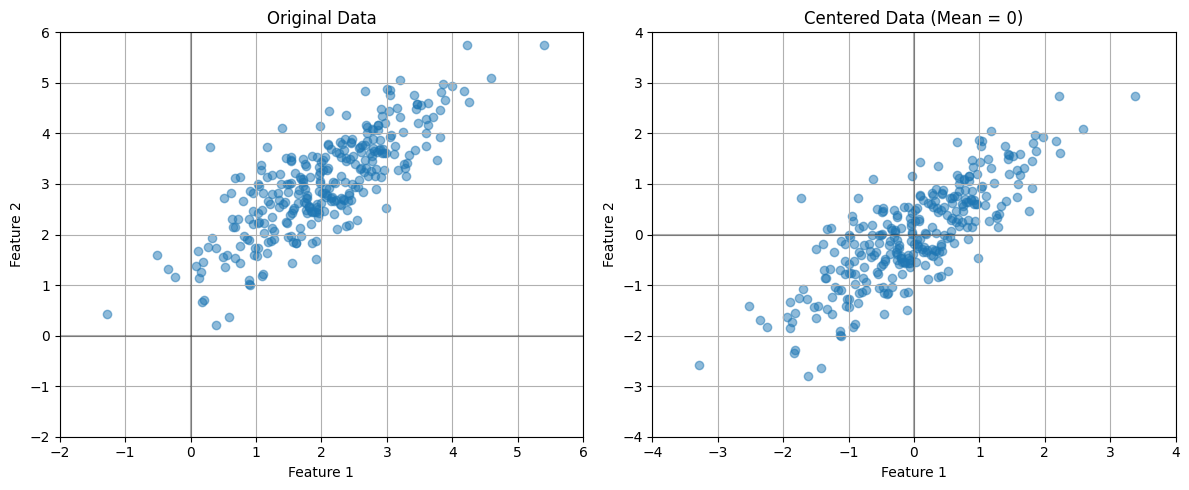

Original data mean: [2.01537093 3.00509085]
Centered data mean: [ 1.01400370e-15 -2.15827356e-15]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate correlated data
np.random.seed(42)
n_samples = 300
mean = [2, 3]  # Original mean not at zero
cov = [[1, 0.8], [0.8, 1]]  # Correlation matrix
data = np.random.multivariate_normal(mean, cov, n_samples)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot original data
ax1.scatter(data[:, 0], data[:, 1], alpha=0.5)
ax1.set_title('Original Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.grid(True)
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
# Set equal axis limits for comparison
ax1.set_xlim(-2, 6)
ax1.set_ylim(-2, 6)

# Center the data (shift to mean zero)
centered_data = data - np.mean(data, axis=0)

# Plot centered data
ax2.scatter(centered_data[:, 0], centered_data[:, 1], alpha=0.5)
ax2.set_title('Centered Data (Mean = 0)')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.grid(True)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
# Set equal axis limits for comparison
ax2.set_xlim(-4, 4)
ax2.set_ylim(-4, 4)

plt.tight_layout()
plt.show()

# Print the means to verify centering
print("Original data mean:", np.mean(data, axis=0))
print("Centered data mean:", np.mean(centered_data, axis=0))
